In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("dark")
sns.set(color_codes=True)

wold_df = pd.read_csv('./data/40_wold.csv')
wold_df.drop(columns=['glottocode'])

,iso,language,lw_perc,num_speakers,continent,borrowing_type
0,rmc,Selice Romani,0.63,1350,europe,very_high
1,rif,Tarifiyt Berber,0.53,1423000,africa,very_high
2,gue,Gurindji,0.48,590,oceania,high
3,ron,Romanian,0.43,24150840,europe,high
4,srm,Saramaccan,0.42,17100,s_america,high
5,eng,English,0.42,983522920,europe,high
6,cwg,Ceq Wong,0.38,460,asia,high
7,jpn,Japanese,0.36,128204860,asia,high
8,ind,Indonesian,0.35,198395070,asia,high
9,tbc,Takia,0.32,40000,oceania,high


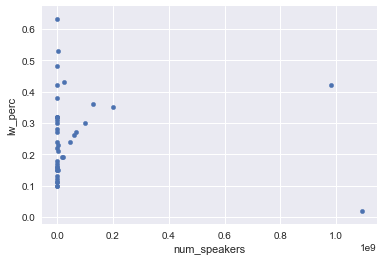

In [2]:
wold_df[['num_speakers', 'lw_perc']].plot(kind='scatter', x='num_speakers', y='lw_perc', grid=True)
# As you can see below, we have two outliers: Mandarin Chinese and English.

In [3]:
wold_df[['num_speakers', 'lw_perc']].corr(method='pearson')

,num_speakers,lw_perc
num_speakers,1.000000,-0.052148
lw_perc,-0.052148,1.000000


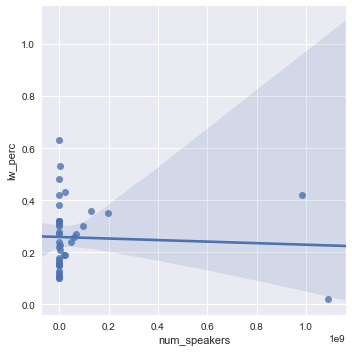

In [4]:
sns.lmplot('num_speakers', 'lw_perc', data=wold_df)

In [5]:
# Applying log to speaker size to bring the outliers closer.
wold_df['num_speakers'] = wold_df['num_speakers'].apply(np.log)

In [6]:
wold_df[['num_speakers', 'lw_perc']].corr(method='pearson')

,num_speakers,lw_perc
num_speakers,1.000000,0.043156
lw_perc,0.043156,1.000000


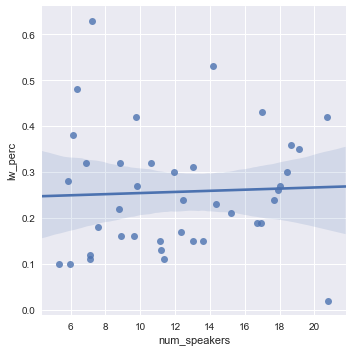

In [7]:
sns.lmplot('num_speakers', 'lw_perc', data=wold_df)

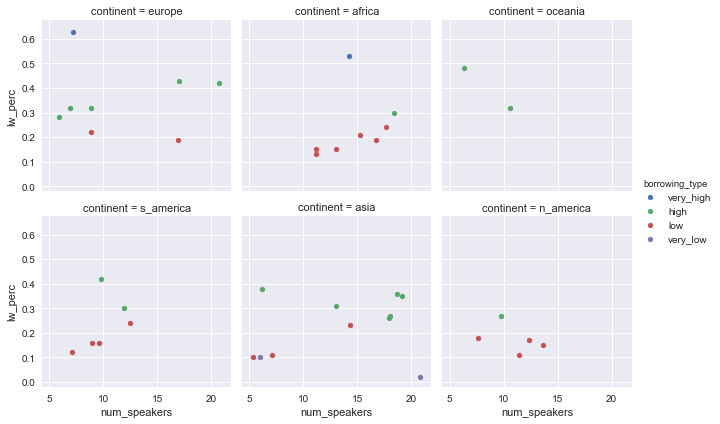

In [8]:
wold_facet = sns.FacetGrid(wold_df, col='continent', hue='borrowing_type', col_wrap=3)
wold_facet.map(plt.scatter, 'num_speakers', 'lw_perc', marker='.', s=100).add_legend()

In [9]:
# Checks if ISO is "cmn" -> "Mandarin Chinese" to be used for filtering later.
not_cmn = wold_df["iso"] != "cmn"
wold_df_without_cmn = wold_df[not_cmn]

In [10]:
wold_df_without_cmn[['num_speakers', 'lw_perc']].corr(method='pearson')

,num_speakers,lw_perc
num_speakers,1.000000,0.144767
lw_perc,0.144767,1.000000


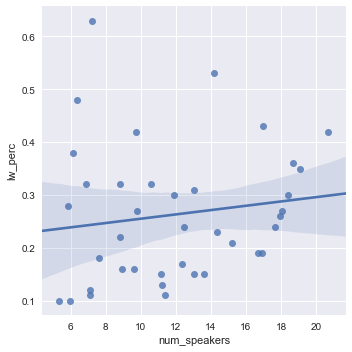

In [11]:
sns.lmplot('num_speakers', 'lw_perc', data=wold_df_without_cmn)

In [12]:
# merging WOLD data with size of L2 speakers (https://en.wikipedia.org/wiki/Second_language)
L2_df = pd.read_csv('./data/L2.csv',sep=';')
wold_L2 = pd.merge(wold_df_without_cmn, L2_df, on='iso')

In [13]:
# although the correlation is high, it should be noted that there are only 10 data points
print(wold_L2[['l2', 'lw_perc']].corr(method='pearson'), '\tNumber of data points: {}'.format(len(wold_L2)))

              l2  lw_perc
l2       1.00000  0.52734
lw_perc  0.52734  1.00000 	Number of data points: 10


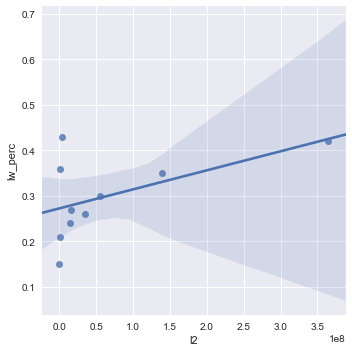

In [14]:
sns.lmplot('l2', 'lw_perc', data=wold_L2)